In [429]:
import pandas as pd
%matplotlib inline
import sklearn as sk
import statsmodels as sm
from matplotlib import pyplot as plt
import seaborn as sbn
from sklearn.feature_selection import chi2

In [3]:
df = pd.read_excel("diabetes_dataset.xlsx")

In [4]:
df.drop(columns= "Unnamed: 0", inplace= True)

In [5]:
df.columns.values

array(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income', 'targets'], dtype=object)

### Health Conditions

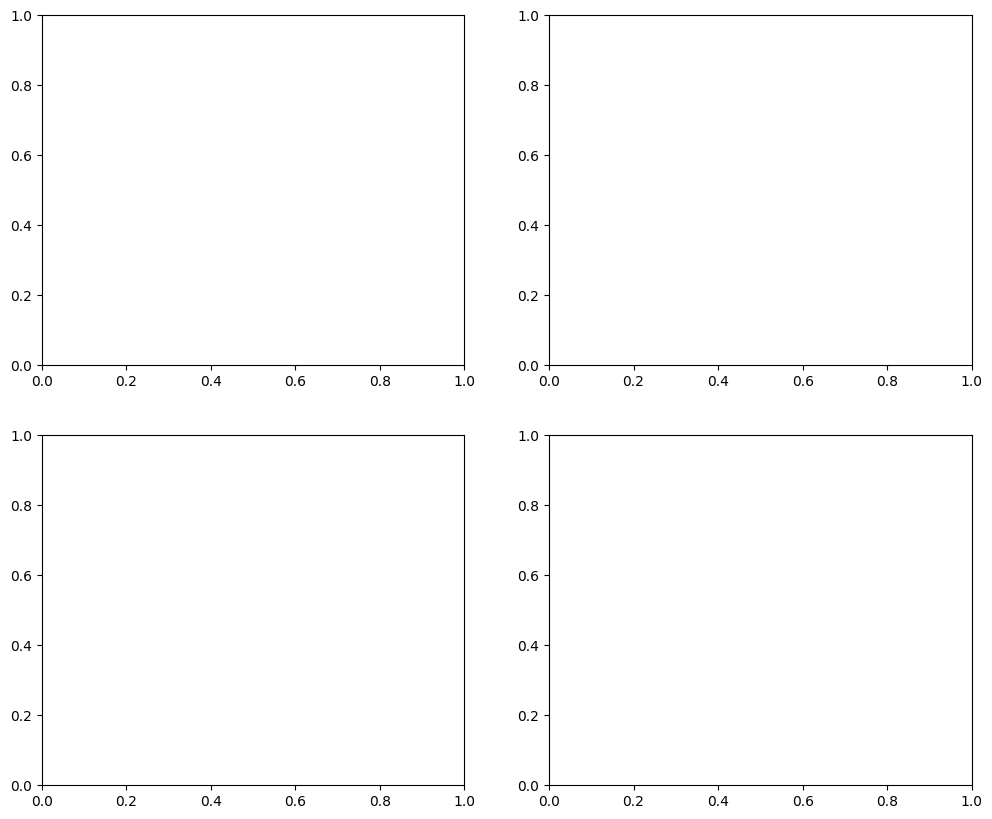

In [100]:
fig1, axes1 = plt.subplots(nrows = 2, ncols = 2 ,sharey = False, sharex = False, figsize = (12,10))
ax1, ax2, ax3, ax4 = axes1.flatten()

In [101]:
bp = round(df["HighBP"].value_counts()/len(df)*100)
bp.plot(kind = 'bar', ax = ax1).set(title = "% with HighBP", ylabel = "Percentage")
ax1.legend()

hc = round(df["HighChol"].value_counts()/len(df)*100)
hc.plot(kind = 'bar', ax = ax2).set(title = "% with HighChol", ylabel = "Percentage")
ax2.legend()

st = round(df["Stroke"].value_counts()/len(df)*100)
st.plot(kind = 'bar', ax = ax3).set(title = "% Had Stroke", ylabel = "Percentage")
ax3.legend()

hd = round(df["HeartDiseaseorAttack"].value_counts()/len(df)*100)
hd.plot(kind = 'bar', ax = ax4).set(title = "% Had Heart Disease/Attack", ylabel = "Percentage")
ax4.legend()



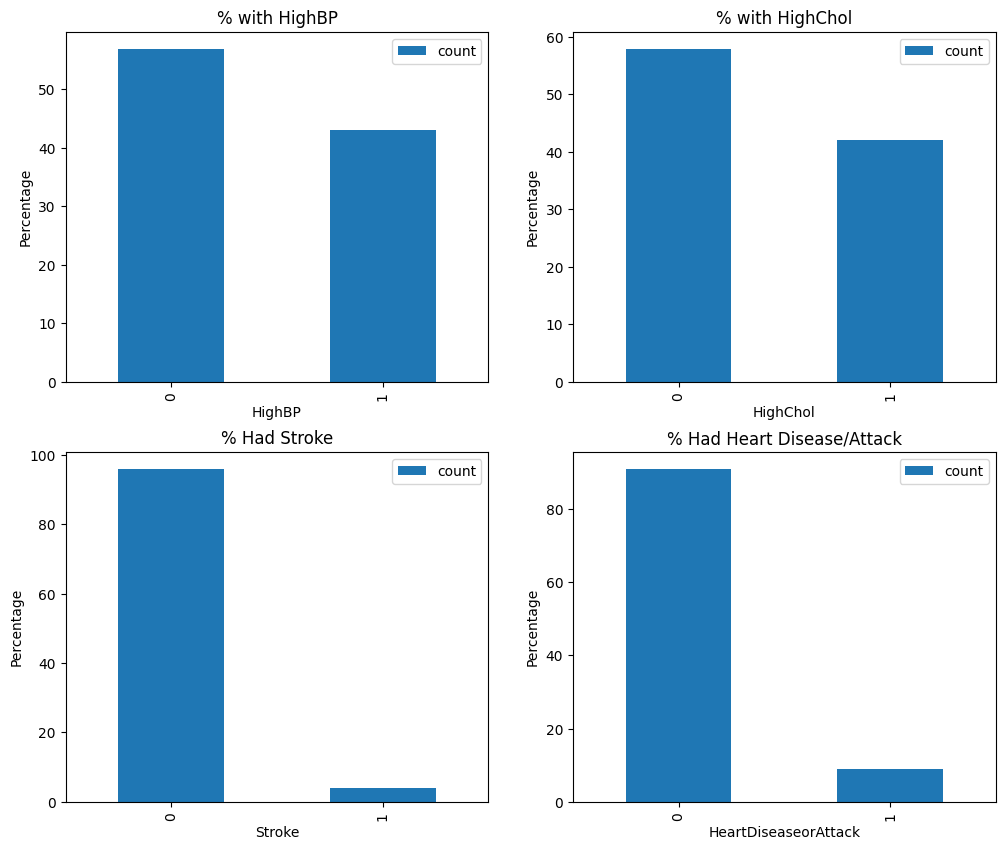

In [102]:
fig1

[Text(0.5, 1.0, 'BMI Distribution'), Text(0.5, 0, 'BMI')]

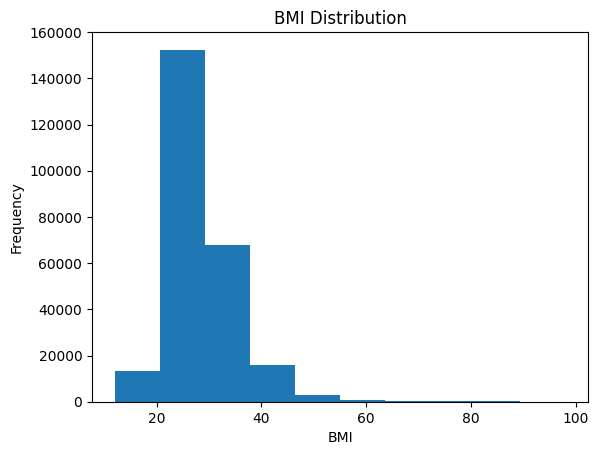

In [137]:
df.BMI.plot.hist().set(title = "BMI Distribution", xlabel = "BMI")

### Self Assessment

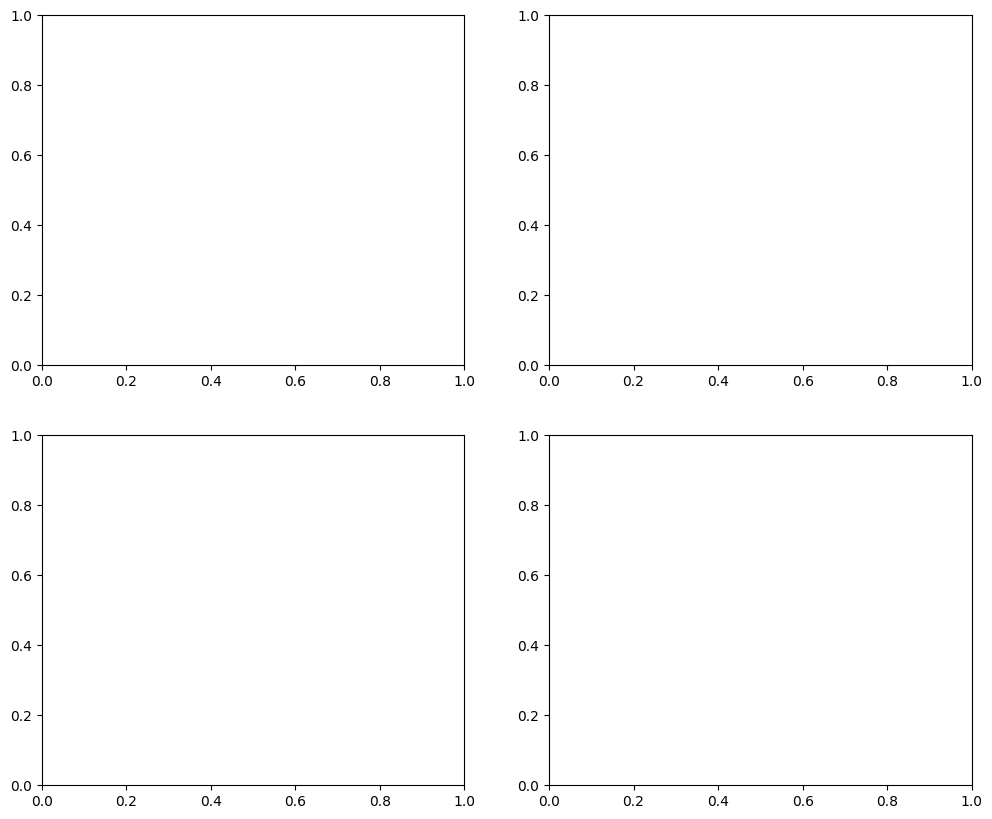

In [138]:
fig2, axes2 = plt.subplots(nrows = 2, ncols = 2 ,sharey = False, sharex = False, figsize = (12,10))
ax5, ax6, ax7, ax8 = axes2.flatten()

In [139]:
df.GenHlth.plot.hist(ax = ax5).set(title = "GenHlth Distribution", xlabel = "GenHlth")

df.MentHlth.plot.hist(ax = ax6).set(title = "MentHlth Distribution", xlabel = "MentHlth")

df.PhysHlth.plot.hist(ax = ax7).set(title = "PhysHlth Distribution", xlabel = "PhysHlth")

dw = round(df["DiffWalk"].value_counts()/len(df)*100)
dw.plot(kind = 'bar', ax = ax8).set(title = "% Difficulty Walking", ylabel = "Percentage")
ax8.legend()

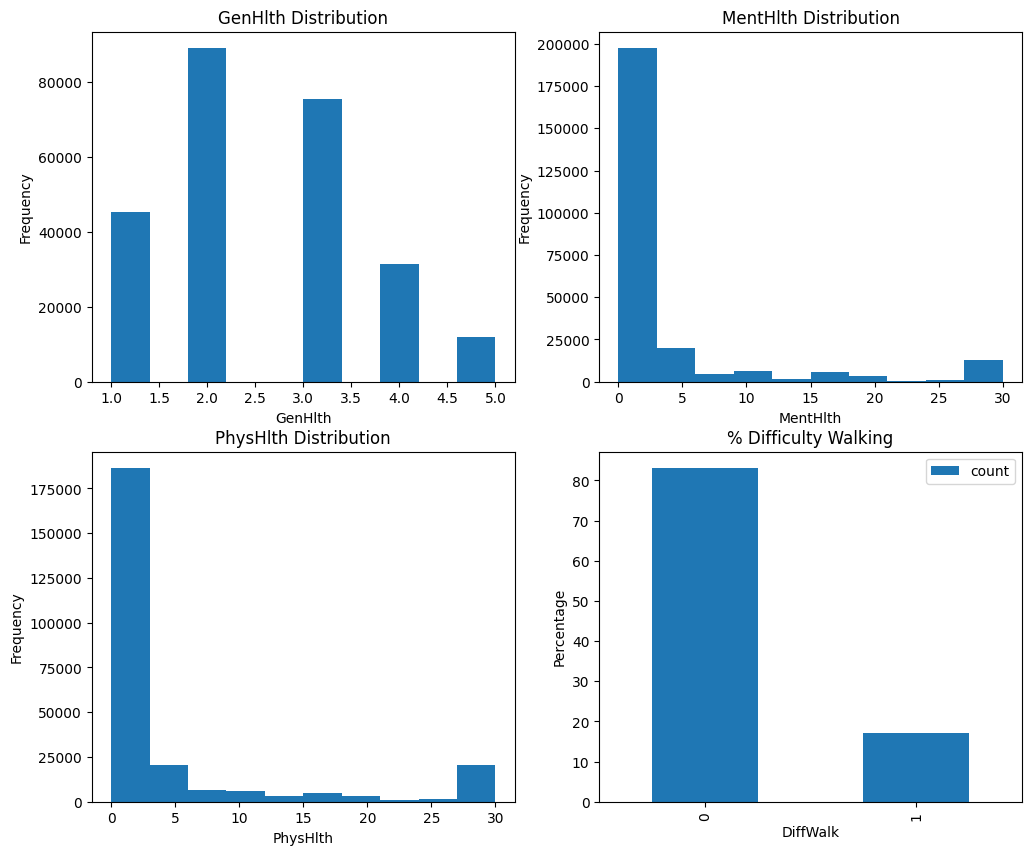

In [140]:
fig2

### Lifestyle Choices

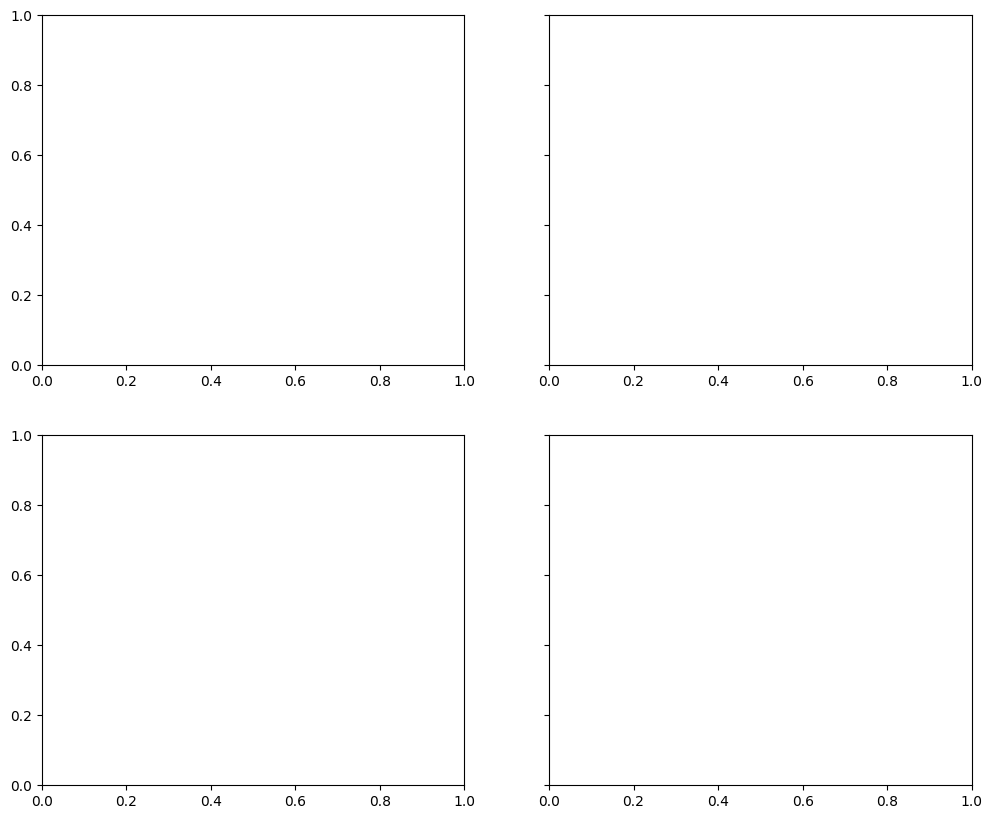

In [142]:
fig3, axes3 = plt.subplots(nrows = 2, ncols = 2 ,sharey = True, sharex = False, figsize = (12,10))
ax9, ax10, ax11, ax12 = axes3.flatten()

In [143]:
sm = round(df["Smoker"].value_counts()/len(df)*100)
sm.plot(kind = 'bar', ax = ax9).set(title = "% who Smoke", ylabel = "Percentage")
ax9.legend()

al = round(df["HvyAlcoholConsump"].value_counts()/len(df)*100)
al.plot(kind = 'bar', ax = ax10).set(title = "Heavy Drinker \n(Male: 14+ - Female: 7+)", ylabel = "Percentage")
ax10.legend()

ft = round(df["Fruits"].value_counts()/len(df)*100)
ft.plot(kind = 'bar', ax = ax11).set(title = "Fruits 1+ Times A Day", ylabel = "Percentage")
ax11.legend()

vg = round(df["Veggies"].value_counts()/len(df)*100)
vg.plot(kind = 'bar', ax = ax12).set(title = "Veggies 1+ Times A Day", ylabel = "Percentage")
ax12.legend()


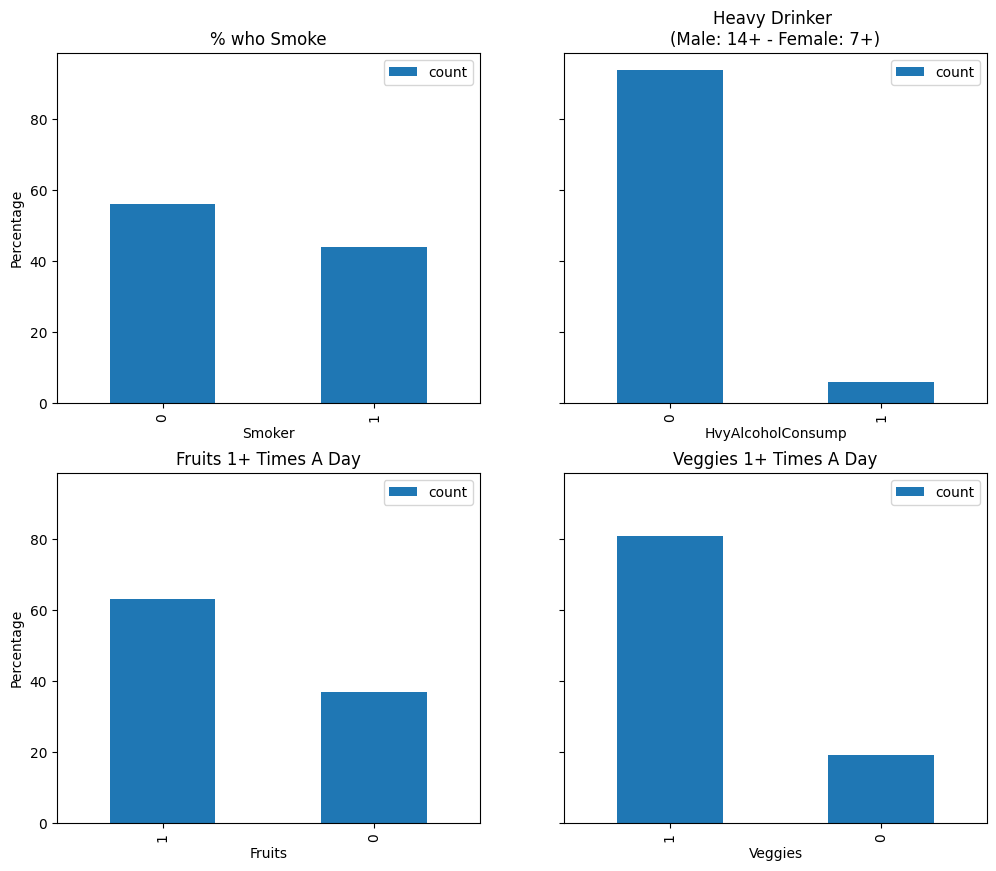

In [144]:
fig3

[Text(0.5, 1.0, 'Physical Activity Last 30 Days'), Text(0, 0.5, 'Percentage')]

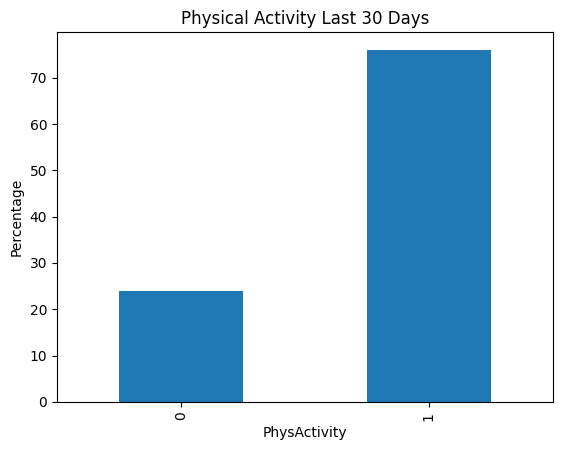

In [110]:
ax13 = plt.subplot(1,1,1)
pa = round(df["PhysActivity"].value_counts()/len(df)*100)
pa.plot(kind = 'bar', ax = ax13).invert_xaxis()
ax13.set(title = "Physical Activity Last 30 Days", ylabel = "Percentage")


### Demographics

In [ ]:
fig4, axes4 = plt.subplots(nrows = 2, ncols = 2 ,sharey = False, sharex = False, figsize = (12,10))
ax14, ax15, ax16, ax17 = axes4.flatten()

In [119]:
sx = round(df["Sex"].value_counts()/len(df)*100)
sx.plot(kind = 'bar', ax = ax14).set(title = "Sex (Female : 0 - Male: 1)", ylabel = "Percentage")
ax14.legend()

df["Age"].plot.hist(ax = ax15).set(title = "Age Distribution", ylabel = "Count")

df["Education"].plot.hist(ax = ax16).set(title = "Education Distribution", ylabel = "Count")

df["Income"].plot.hist(ax = ax17).set(title = "Income Distribution", ylabel = "Count")

[Text(0.5, 1.0, 'Income Distribution'), Text(511.7171717171717, 0.5, 'Count')]

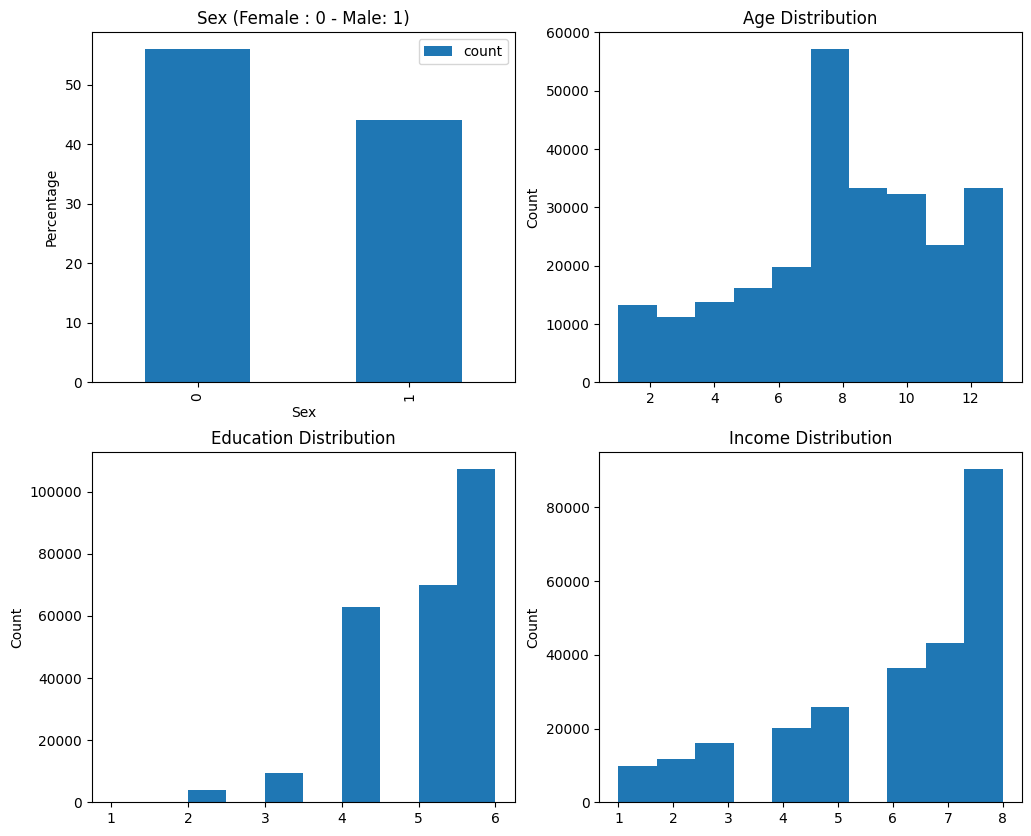

In [120]:
fig4

### Healthcare

In [ ]:
fig5, (ax18, ax19, ax20)= plt.subplots(nrows = 1, ncols = 3 ,sharey = False, sharex = False, figsize = (14,6))


In [123]:
cc = round(df["CholCheck"].value_counts()/len(df)*100)
cc.plot(kind = 'bar', ax = ax18).set(title = "Chol Check Last 5 Years", ylabel = "Percentage")
ax18.legend()

hc = round(df["AnyHealthcare"].value_counts()/len(df)*100)
hc.plot(kind = 'bar', ax = ax19).set(title = "% with Healthcare Coverage", ylabel = "Percentage")
ax19.legend()

dv = round(df["NoDocbcCost"].value_counts()/len(df)*100)
dv.plot(kind = 'bar', ax = ax20).set(title = "% Could not Afford Doctor Visit", ylabel = "Percentage")
ax20.legend()

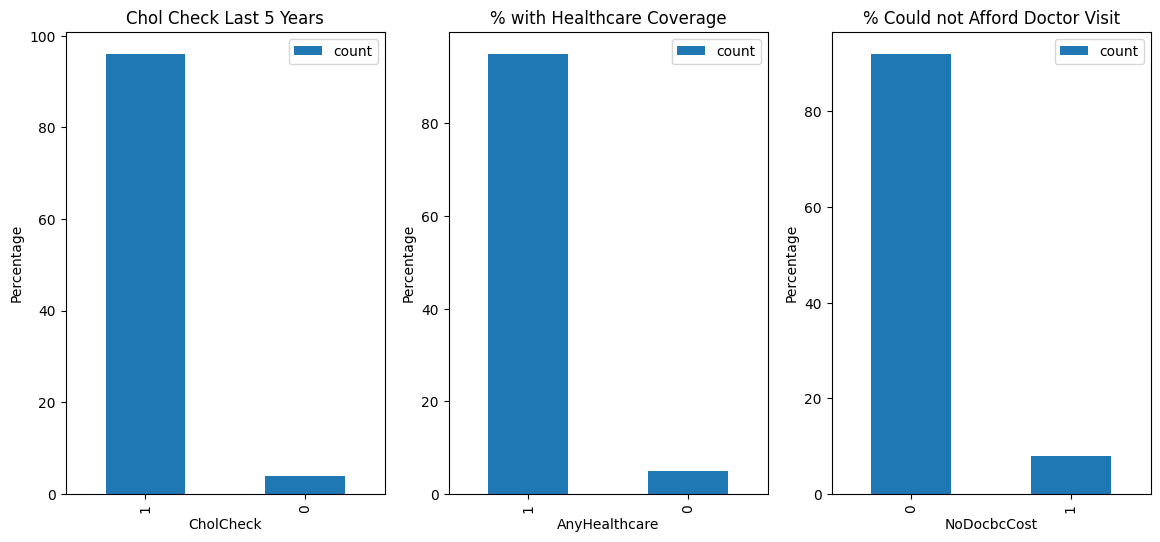

In [124]:
fig5

### Have Diabetes (Target)

[Text(0.5, 1.0, '% Have Diabetes'), Text(0, 0.5, 'Percentage')]

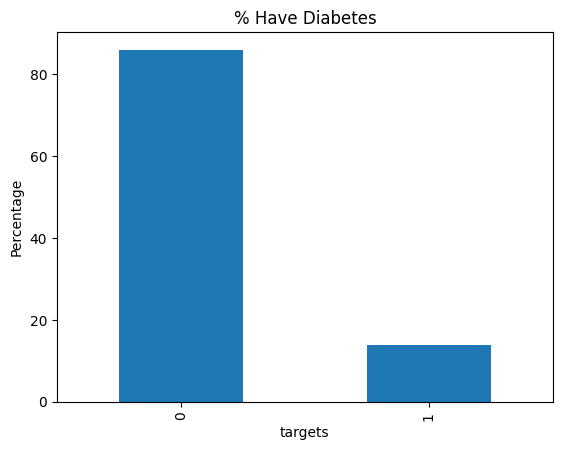

In [147]:
db = round(df["targets"].value_counts()/len(df)*100)
db.plot(kind = 'bar').set(title = "% Have Diabetes", ylabel = "Percentage")

### Probabilities (Binary)

In [508]:
binary_columns = ["HighBP","HighChol","CholCheck","Smoker","Stroke","HeartDiseaseorAttack","PhysActivity","DiffWalk","Fruits","Veggies","HvyAlcoholConsump","AnyHealthcare","NoDocbcCost","Sex",]

#### Marginal Probabilities

In [509]:
marg_prob_df = pd.DataFrame(index = [0],columns = [["HighBP","HighChol","CholCheck","Smoker","Stroke","HeartDiseaseorAttack","PhysActivity","DiffWalk","Fruits","Veggies","HvyAlcoholConsump","AnyHealthcare","NoDocbcCost","Sex",
]])

In [510]:
# Create Marginal Probabilities
for name in binary_columns:
    marg_prob = sum(df[name]==1)/len(df)
    marg_prob = round(marg_prob* 100, 2)
    marg_prob_df[name] = marg_prob

marg_prob_df["Female"] = round((sum(df.Sex.eq(0))/len(df))*100,2)
marg_prob_df.rename(columns = {"Sex" : "Male"}, inplace= True)

In [511]:
marg_prob_df

,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,DiffWalk,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,Male,Female
0,42.9,42.41,96.27,44.32,4.06,9.42,75.65,16.82,63.43,81.14,5.62,95.11,8.42,44.03,55.97


#### Joint Probabilities

In [512]:
joint_prob_df = pd.DataFrame(index = ["Has Diabetes"], columns = [["HighBP","HighChol","CholCheck","Smoker","Stroke","HeartDiseaseorAttack","PhysActivity","DiffWalk","Fruits","Veggies","HvyAlcoholConsump","AnyHealthcare","NoDocbcCost","Sex",
]])

In [513]:
for name in binary_columns:
    joint_prob = len(df[df["targets"].eq(1) & df[name].eq(1)])/len(df)
    joint_prob_df[name] = round(joint_prob* 100, 2)

joint_prob_df['Female'] = round((len(df[df["targets"].eq(1) & df["Sex"].eq(0)])/len(df))*100,2)
joint_prob_df.rename(columns = {"Sex" : "Male"}, inplace= True)

In [514]:
joint_prob_df

,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,DiffWalk,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,Male,Female
Has Diabetes,10.49,9.34,13.84,7.22,1.29,3.11,8.79,5.17,8.16,10.54,0.33,13.37,1.48,6.68,7.26


Check Joint Probability
pd.crosstab(df["HighBP"], df["targets"], normalize = True)

#### Conditional Probability

##### Probability of X given having Diabities

In [515]:
cond_prob_df = pd.DataFrame(index = ["Has Diabetes"], columns = [["HighBP","HighChol","CholCheck","Smoker","Stroke","HeartDiseaseorAttack","PhysActivity","DiffWalk","Fruits","Veggies","HvyAlcoholConsump","AnyHealthcare","NoDocbcCost","Sex",
]])

In [516]:
for name in binary_columns:
    joint_prob = len(df[df["targets"].eq(1) & df[name].eq(1)])/len(df)
    marg_prob = sum(df["targets"]==1)/len(df)
    cond_prob_df[name] = round((joint_prob/marg_prob)*100,2)

cond_prob_df["Female"] = round(((len(df[df["targets"].eq(1) & df["Sex"].eq(0)])/len(df))/(sum(df["targets"]==1)/len(df)))*100,2)
cond_prob_df.rename(columns = {"Sex" : "Male"}, inplace= True)

In [517]:
cond_prob_df

,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,DiffWalk,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,Male,Female
Has Diabetes,75.27,67.01,99.32,51.82,9.25,22.29,63.05,37.12,58.54,75.64,2.35,95.98,10.59,47.91,52.09


##### Probability of Having Diabities Given X

In [518]:
cond_prob_df2 = pd.DataFrame(index = ["Has Diabetes"], columns = [["HighBP","HighChol","CholCheck","Smoker","Stroke","HeartDiseaseorAttack","PhysActivity","DiffWalk","Fruits","Veggies","HvyAlcoholConsump","AnyHealthcare","NoDocbcCost","Sex",
]])

In [519]:
for name in binary_columns:
    joint_prob = len(df[df["targets"].eq(1) & df[name].eq(1)])/len(df)
    marg_prob = sum(df[name]==1)/len(df)
    cond_prob_df2[name] = round((joint_prob/marg_prob)*100,2)

cond_prob_df2["Female"] = round(((len(df[df["targets"].eq(1) & df["Sex"].eq(0)])/len(df))/(sum(df["Sex"]==0)/len(df)))*100,2)
cond_prob_df2.rename(columns = {"Sex" : "Male"}, inplace= True)   

In [520]:
cond_prob_df2

,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,DiffWalk,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,Male,Female
Has Diabetes,24.45,22.01,14.37,16.29,31.75,32.97,11.61,30.75,12.86,12.99,5.84,14.06,17.52,15.16,12.97


### Probabilities (Discrete)

#### Joint Probabilities

In [466]:
# Joint Probability of Age and Have Diabetes
age_crosstab = round(pd.crosstab(df["Age"],df["targets"], normalize= True)*100,2)

age_crosstab


targets,0,1
Age,,
1,2.22,0.03
2,2.94,0.06
3,4.26,0.12
4,5.20,0.25
5,5.95,0.41
6,7.13,0.69
7,9.16,1.22
8,10.47,1.68
9,10.84,2.26


In [456]:
# Joint probability of Education and Diabetes
education_crosstab = round(pd.crosstab(df["Education"],df["targets"], normalize= True)*100,2)

education_crosstab

targets,0,1
Education,,
1,0.05,0.02
2,1.13,0.47
3,2.83,0.91
4,20.37,4.36
5,23.48,4.08
6,38.21,4.10


In [457]:
# Joint Probability of Income and Having Diabetes
income_crosstab = round(pd.crosstab(df["Income"],df["targets"], normalize= True)*100,2)

income_crosstab

targets,0,1
Income,,
1,2.93,0.94
2,3.43,1.22
3,4.90,1.41
4,6.34,1.60
5,8.43,1.78
6,12.29,2.09
7,14.96,2.08
8,32.79,2.84


In [493]:
# Joint Probability of PhysHlth and Having Diabetes
physhlth_crosstab = round(pd.crosstab(df["PhysHlth"],df["targets"], normalize= True)*100,2)

physhlth_crosstab

targets,0,1
PhysHlth,,
0,56.49,6.60
1,4.02,0.47
2,5.02,0.80
3,2.84,0.51
4,1.49,0.30
5,2.49,0.52
6,0.41,0.11
7,1.50,0.29
8,0.26,0.06


In [494]:
# Joint Probability of MentHlth and Having Diabetes
menthlth_crosstab = round(pd.crosstab(df["MentHlth"],df["targets"], normalize= True)*100,2)

menthlth_crosstab

targets,0,1
MentHlth,,
0,60.03,9.23
1,3.05,0.32
2,4.55,0.59
3,2.55,0.36
4,1.30,0.19
5,3.08,0.48
6,0.32,0.06
7,1.06,0.16
8,0.21,0.04


In [495]:
# Joint Probability of GenHlth and Having Diabetes
genhlth_crosstab = round(pd.crosstab(df["GenHlth"],df["targets"], normalize= True)*100,2)

genhlth_crosstab

targets,0,1
GenHlth,,
1,17.41,0.45
2,32.60,2.52
3,24.51,5.30
4,8.59,3.86
5,2.96,1.80


#### Conditional Probabilities

##### Probability of X given Having Diabetes

<Axes: xlabel='BMI'>

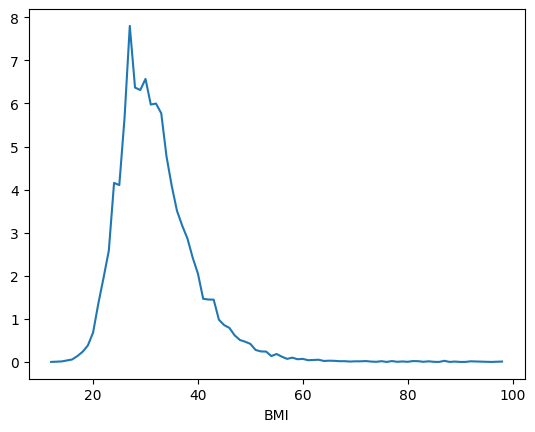

In [414]:
# Conditional Probability of BMI given Having Diabetes
bmi_cross = pd.crosstab(df["BMI"],df["targets"])

bmi_cross["Cond_Prob"] = (bmi_cross[1]/sum(df.targets.eq(1)))*100

bmi_cross["Cond_Prob"].plot(kind = "line")

[Text(0.5, 1.0, 'Conditional Probability\n Age given Having Diabetes'),
 Text(0, 0.5, 'Percentage')]

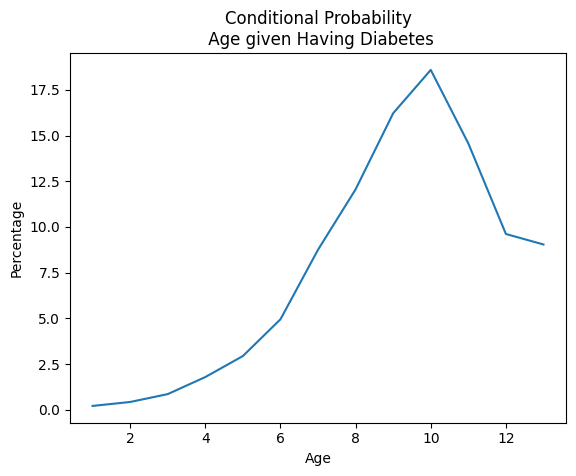

In [469]:
# Conditional Probability of Age given Having Diabetes
age_crosstab["Cond_Prob"] = (age_crosstab[1]/(sum(df.targets.eq(1))/len(df)))

age_crosstab["Cond_Prob"].plot(kind = "line").set(title = "Conditional Probability\n Age given Having Diabetes", ylabel = "Percentage")


[Text(0.5, 1.0, 'Conditional Probability\n Education given Having Diabetes'),
 Text(0, 0.5, 'Percentage')]

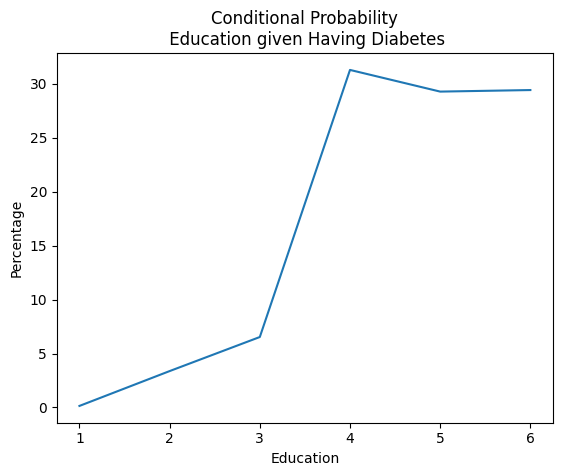

In [ ]:
# Conditional Probability of Education given Having Diabetes
education_crosstab["Cond_Prob"] = (education_crosstab[1]/(sum(df.targets.eq(1))/len(df)))

education_crosstab["Cond_Prob"].plot(kind = "line").set(title = "Conditional Probability\n Education given Having Diabetes", ylabel = "Percentage")


[Text(0.5, 1.0, 'Conditional Probability\n Income given Having Diabetes'),
 Text(0, 0.5, 'Percentage')]

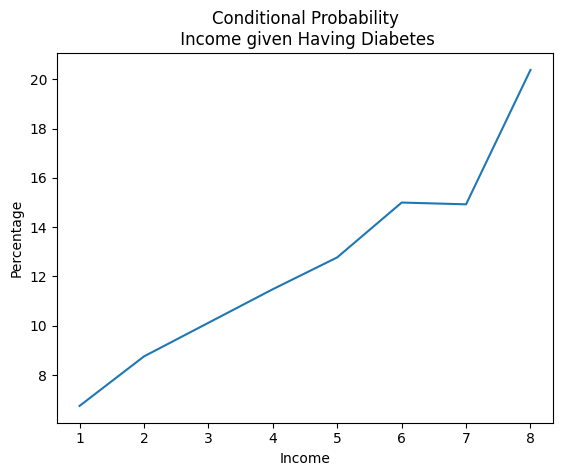

In [471]:
# Conditional Probability of Income given Having Diabetes
income_crosstab["Cond_Prob"] = (income_crosstab[1]/(sum(df.targets.eq(1))/len(df)))

income_crosstab["Cond_Prob"].plot(kind = "line").set(title = "Conditional Probability\n Income given Having Diabetes", ylabel = "Percentage")

[Text(0.5, 1.0, 'Conditional Probability\n PhysHlth given Having Diabetes'),
 Text(0, 0.5, 'Percentage')]

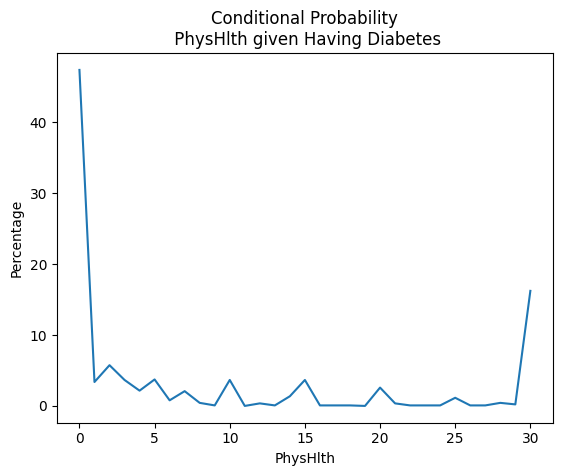

In [496]:
# Conditional Probability of PhysHlth given Having Diabetes
physhlth_crosstab["Cond_Prob"] = (physhlth_crosstab[1]/(sum(df.targets.eq(1))/len(df)))

physhlth_crosstab["Cond_Prob"].plot(kind = "line").set(title = "Conditional Probability\n PhysHlth given Having Diabetes", ylabel = "Percentage")

[Text(0.5, 1.0, 'Conditional Probability\n MentHlth given Having Diabetes'),
 Text(0, 0.5, 'Percentage')]

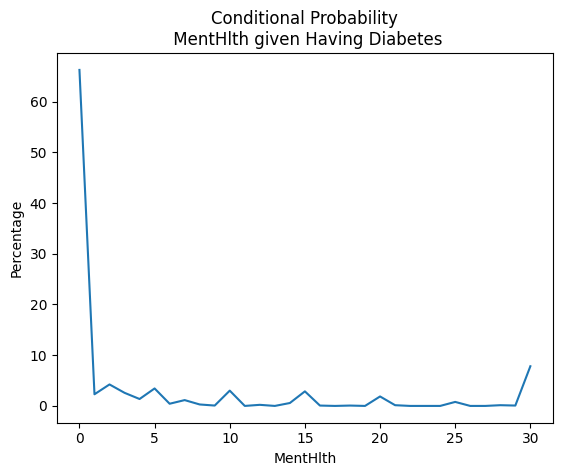

In [497]:
# Conditional Probability of MentHlth given Having Diabetes
menthlth_crosstab["Cond_Prob"] = (menthlth_crosstab[1]/(sum(df.targets.eq(1))/len(df)))

menthlth_crosstab["Cond_Prob"].plot(kind = "line").set(title = "Conditional Probability\n MentHlth given Having Diabetes", ylabel = "Percentage")

[Text(0.5, 1.0, 'Conditional Probability\n GenHlth given Having Diabetes'),
 Text(0, 0.5, 'Percentage')]

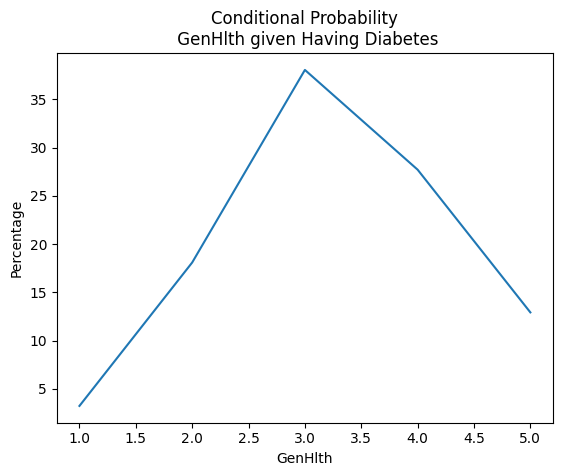

In [498]:
# Conditional Probability of GenHlth given Having Diabetes
genhlth_crosstab["Cond_Prob"] = (genhlth_crosstab[1]/(sum(df.targets.eq(1))/len(df)))

genhlth_crosstab["Cond_Prob"].plot(kind = "line").set(title = "Conditional Probability\n GenHlth given Having Diabetes", ylabel = "Percentage")

##### Probability of Having Diabetes given X

[Text(0.5, 1.0, 'Conditional Probability\n Having Diabetes Given BMI'),
 Text(0, 0.5, 'Percentage')]

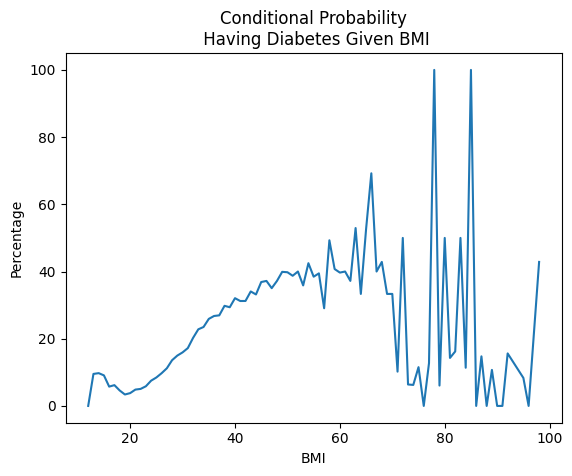

In [500]:
# Conditional Probability of Having Diabeties given BMI
bmi_cross2 = pd.crosstab(df["BMI"],df["targets"])

Marg_Prob = []

for value in bmi_cross2.index.values:
    marg_prob = len(df[df["BMI"].eq(value)])
    Marg_Prob.append(marg_prob)

bmi_cross2["Marg_BMI"] = Marg_Prob

bmi_cross2["Cond_Prob"] = (bmi_cross2[1]/bmi_cross2["Marg_BMI"])*100

bmi_cross2["Cond_Prob"].plot(kind = "line").set(title = "Conditional Probability\n Having Diabetes Given BMI", ylabel = "Percentage")


[Text(0.5, 1.0, 'Conditional Probability\n Having Diabetes Given Age'),
 Text(0, 0.5, 'Percentage')]

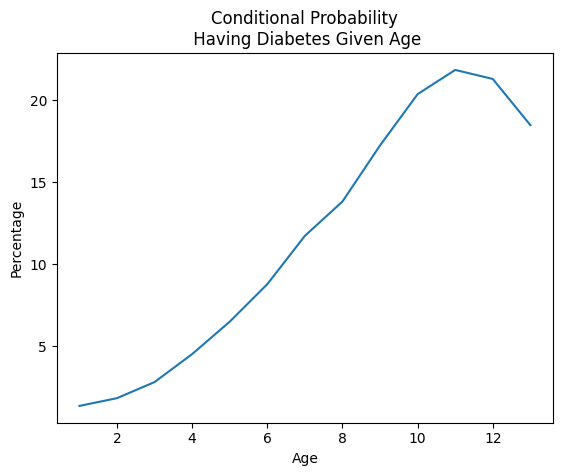

In [501]:
# Conditional Probability of Having Diabeties given Age
age_cross2 = pd.crosstab(df["Age"],df["targets"])

Marg_Prob = []

for value in age_cross2.index.values:
    marg_prob = len(df[df["Age"].eq(value)])
    Marg_Prob.append(marg_prob)

age_cross2["Marg_BMI"] = Marg_Prob

age_cross2["Cond_Prob"] = (age_cross2[1]/age_cross2["Marg_BMI"])*100

age_cross2["Cond_Prob"].plot(kind = "line").set(title = "Conditional Probability\n Having Diabetes Given Age", ylabel = "Percentage")


[Text(0.5, 1.0, 'Conditional Probability\n Having Diabetes Given Education'),
 Text(0, 0.5, 'Percentage')]

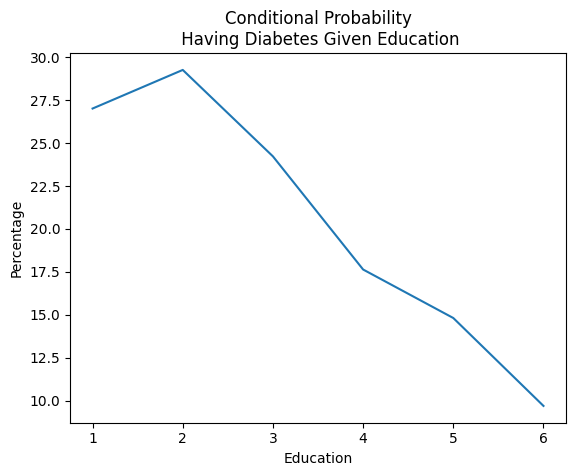

In [502]:
# Conditional Probability of Having Diabeties given Education
education_cross2 = pd.crosstab(df["Education"],df["targets"])

Marg_Prob = []

for value in education_cross2.index.values:
    marg_prob = len(df[df["Education"].eq(value)])
    Marg_Prob.append(marg_prob)

education_cross2["Marg_BMI"] = Marg_Prob

education_cross2["Cond_Prob"] = (education_cross2[1]/education_cross2["Marg_BMI"])*100

education_cross2["Cond_Prob"].plot(kind = "line").set(title = "Conditional Probability\n Having Diabetes Given Education", ylabel = "Percentage")


[Text(0.5, 1.0, 'Conditional Probability\n Having Diabetes Given Income'),
 Text(0, 0.5, 'Percentage')]

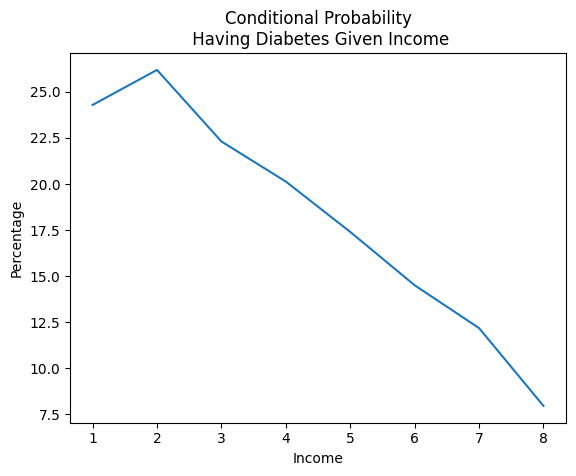

In [503]:
# Conditional Probability of Having Diabeties given Income
income_cross2 = pd.crosstab(df["Income"],df["targets"])

Marg_Prob = []

for value in income_cross2.index.values:
    marg_prob = len(df[df["Income"].eq(value)])
    Marg_Prob.append(marg_prob)

income_cross2["Marg_BMI"] = Marg_Prob

income_cross2["Cond_Prob"] = (income_cross2[1]/income_cross2["Marg_BMI"])*100

income_cross2["Cond_Prob"].plot(kind = "line").set(title = "Conditional Probability\n Having Diabetes Given Income", ylabel = "Percentage")


[Text(0.5, 1.0, 'Conditional Probability\n Having Diabetes Given PhysHlth'),
 Text(0, 0.5, 'Percentage')]

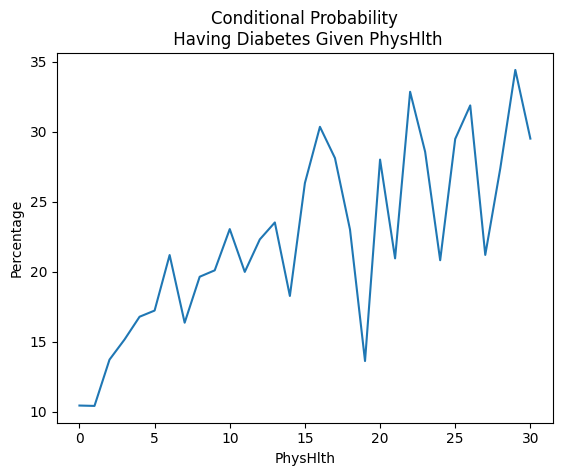

In [504]:
# Conditional Probability of Having Diabeties given PhysHlth
physhlth_cross2 = pd.crosstab(df["PhysHlth"],df["targets"])

Marg_Prob = []

for value in physhlth_cross2.index.values:
    marg_prob = len(df[df["PhysHlth"].eq(value)])
    Marg_Prob.append(marg_prob)

physhlth_cross2["Marg_BMI"] = Marg_Prob

physhlth_cross2["Cond_Prob"] = (physhlth_cross2[1]/physhlth_cross2["Marg_BMI"])*100

physhlth_cross2["Cond_Prob"].plot(kind = "line").set(title = "Conditional Probability\n Having Diabetes Given PhysHlth", ylabel = "Percentage")


[Text(0.5, 1.0, 'Conditional Probability\n Having Diabetes Given MentHlth'),
 Text(0, 0.5, 'Percentage')]

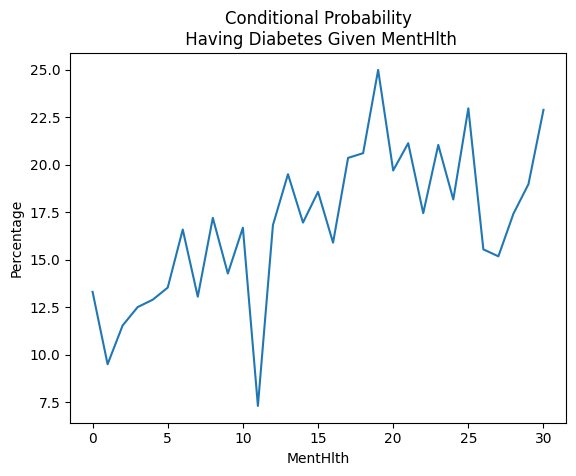

In [505]:
# Conditional Probability of Having Diabeties given MentHlth
menthlth_cross2 = pd.crosstab(df["MentHlth"],df["targets"])

Marg_Prob = []

for value in menthlth_cross2.index.values:
    marg_prob = len(df[df["MentHlth"].eq(value)])
    Marg_Prob.append(marg_prob)

menthlth_cross2["Marg_BMI"] = Marg_Prob

menthlth_cross2["Cond_Prob"] = (menthlth_cross2[1]/menthlth_cross2["Marg_BMI"])*100

menthlth_cross2["Cond_Prob"].plot(kind = "line").set(title = "Conditional Probability\n Having Diabetes Given MentHlth", ylabel = "Percentage")


[Text(0.5, 1.0, 'Conditional Probability\n Having Diabetes Given GenHlth'),
 Text(0, 0.5, 'Percentage')]

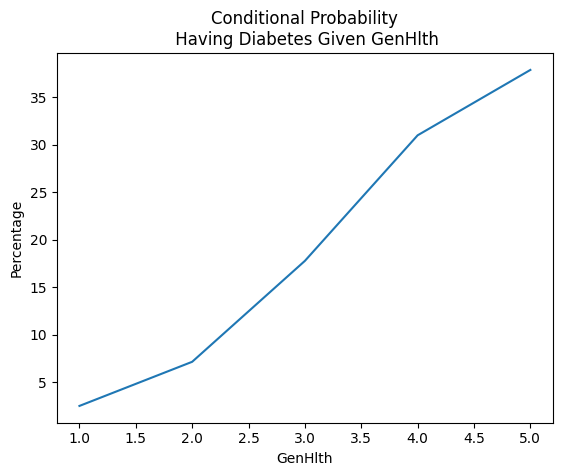

In [507]:
# Conditional Probability of Having Diabeties given GentHlth
genhlth_cross2 = pd.crosstab(df["GenHlth"],df["targets"])

Marg_Prob = []

for value in genhlth_cross2.index.values:
    marg_prob = len(df[df["GenHlth"].eq(value)])
    Marg_Prob.append(marg_prob)

genhlth_cross2["Marg_BMI"] = Marg_Prob

genhlth_cross2["Cond_Prob"] = (genhlth_cross2[1]/genhlth_cross2["Marg_BMI"])*100

genhlth_cross2["Cond_Prob"].plot(kind = "line").set(title = "Conditional Probability\n Having Diabetes Given GenHlth", ylabel = "Percentage")

### Chi Sqaure Test

In [443]:
chi2_stats, pvalues = chi2(df[binary_columns], df["targets"].values)

In [447]:
chi2_df = pd.DataFrame(index = [["Chi2","Pvalues"]],columns = [["HighBP","HighChol","CholCheck","Smoker","Stroke","HeartDiseaseorAttack","PhysActivity","Fruits","Veggies","HvyAlcoholConsump","AnyHealthcare","NoDocbcCost","Sex",
]])

In [449]:
chi2_df.loc["Chi2"] = chi2_stats

In [451]:
chi2_df.loc["Pvalues"] = pvalues

In [452]:
chi2_df

,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,Sex
Chi2,10029.013935,5859.710582,39.716825,521.978858,2725.225194,7221.975378,861.887532,154.291404,153.169215,779.424807,3.280938,229.542412,140.248274
Pvalues,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070089,0.0,0.0


In [445]:
pvalues

array([0.00000000e+000, 0.00000000e+000, 2.93585367e-010, 1.57042296e-115,
       0.00000000e+000, 0.00000000e+000, 1.89327093e-189, 2.00007326e-035,
       3.51796340e-035, 1.60528118e-171, 7.00888408e-002, 7.50127847e-052,
       2.34921223e-032])